<a href="https://colab.research.google.com/github/ky691024/colab_0703_AI/blob/main/cnn20230807_2041.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow.keras.datasets import cifar10
# ((nparray:x_train, nparray:y_train), (nparray:x_test, nparray:y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [13]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [14]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

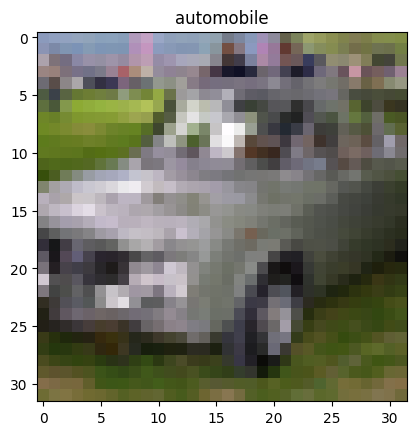

In [15]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
idx = 44
plt.title("{}".format(trans[y_train[idx]]))
plt.imshow(x_train[idx])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

l = [
    # 1個filter(3 * 3 * 3) * 64(種過濾方式 + 64(bias)
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種過濾方式) + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 128) * 256(種過濾方式) + 256(bias) = 295168
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 256) * 512(種過濾方式) + 512(bias) = 1180160
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 256)       

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D

l = [
    # 1個filter(3 * 3 * 3) * 64(種過濾方式 + 64(bias)
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種過濾方式) + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 128) * 256(種過濾方式) + 256(bias) = 295168
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 256) * 512(種過濾方式) + 512(bias) = 1180160
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 256)       

In [18]:
# 如果你使用sparse版本妳就不用自己做y的one-hot(節省ram)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [19]:
# 0 to 1 range
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=100,
     validation_split=0.1,
     callbacks=c)

Epoch 1/100
225/225 [==============================] - 6s 20ms/step - loss: 1.6454 - accuracy: 0.3881 - val_loss: 1.3875 - val_accuracy: 0.5060
Epoch 2/100
225/225 [==============================] - 4s 19ms/step - loss: 1.2154 - accuracy: 0.5610 - val_loss: 1.0329 - val_accuracy: 0.6326
Epoch 3/100
225/225 [==============================] - 4s 18ms/step - loss: 0.9868 - accuracy: 0.6519 - val_loss: 0.9523 - val_accuracy: 0.6706
Epoch 4/100
225/225 [==============================] - 4s 18ms/step - loss: 0.8489 - accuracy: 0.7067 - val_loss: 0.8037 - val_accuracy: 0.7210
Epoch 5/100
225/225 [==============================] - 4s 20ms/step - loss: 0.7398 - accuracy: 0.7432 - val_loss: 0.7685 - val_accuracy: 0.7316
Epoch 6/100
225/225 [==============================] - 4s 18ms/step - loss: 0.6587 - accuracy: 0.7720 - val_loss: 0.6941 - val_accuracy: 0.7626
Epoch 7/100
225/225 [==============================] - 4s 18ms/step - loss: 0.5778 - accuracy: 0.7994 - val_loss: 0.6694 - val_accuracy:

In [21]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6531 - accuracy: 0.7798


[0.6530517339706421, 0.7797999978065491]

In [22]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
pd.DataFrame(confusion_matrix(y_test, pre),
       columns=["{}(pre)".format(trans[i]) for i in range(10)],
       index=["{}(true)".format(trans[i]) for i in range(10)])

313/313 [==============================] - 1s 2ms/step


,airplane(pre),automobile(pre),bird(pre),cat(pre),deer(pre),dog(pre),frog(pre),horse(pre),ship(pre),truck(pre)
airplane(true),850,11,9,20,19,6,5,5,39,36
automobile(true),9,885,3,7,1,2,2,1,14,76
bird(true),74,8,629,69,91,48,39,23,10,9
cat(true),18,11,39,652,59,136,46,19,6,14
deer(true),11,2,40,46,812,32,25,23,6,3
dog(true),11,6,20,172,47,695,14,21,6,8
frog(true),9,6,31,68,37,18,818,4,5,4
horse(true),14,4,23,56,86,52,6,743,2,14
ship(true),66,22,8,16,10,2,1,1,849,25
truck(true),24,67,5,13,3,3,2,6,12,865


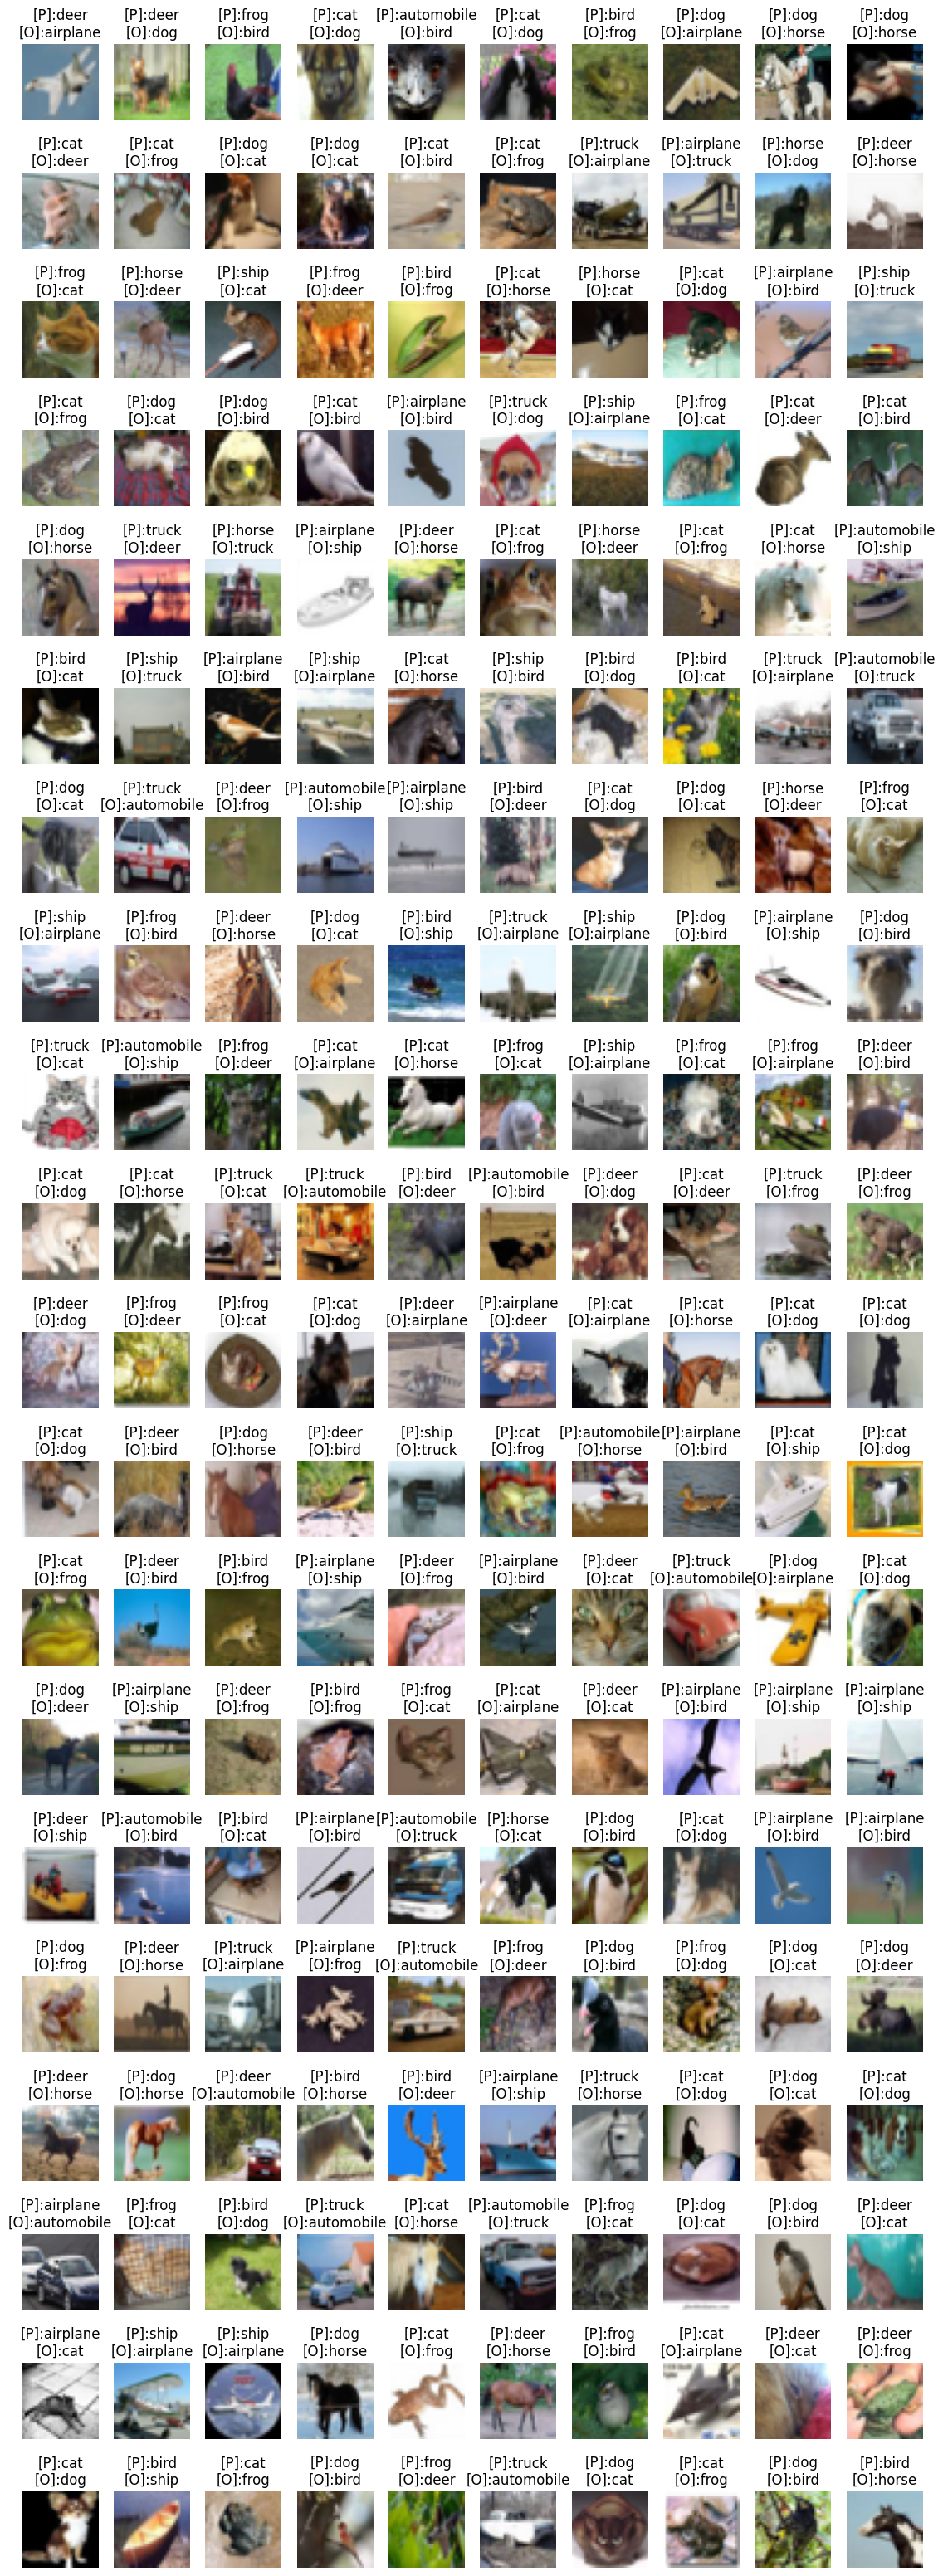

In [23]:
import numpy as np
# !!!
idx = np.nonzero(pre != y_test)[0][:200]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
width = 10
height= len(idx) // 10 + 1
plt.figure(figsize=(14, 42))
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(trans[false_pre[i]],
                   trans[false_true[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])